## ABOUT DATASET

This dataset contains information of about 6,590 students and the factors that may affect their academic performance. It includes variables such as study habits, attendance, parental involvement, access to resources, extracurricular activities, sleep hours, motivation, and socio-economic background. Academic results are measured through previous and final exam scores

## COLUMN DESCRIPTION

**Hours_Studied** : Number of hours a student study

**Attendance**: Attendance percentage

**Parental_Involvement**: Level of involvement from parents

**Access_to_Resources**: Availability of study resources

**Internet_Access**: Availability of Internet

**Extracurricular_Activities**: Participation in extracurricular activities

**Sleep_Hours**: sleep hours per day

**Previous_Scores**:previous academic assessments

**Motivation_Level**: student motivation

**Family_Income**: income of father or family

**Teacher_Quality**: quality of teachers

**School_Type**: Type of school attended

**Peer_Influence**: Influence of peers

**Physical_Activity**: physical exercise or activity

**Learning_Disabilities**:Whether the student has any learning disabilities

**Tutoring_Sessions**: No of Tuitions

**Parental_Education_Level**: Highest education level of parents

**Distance_from_Home**: Distance between home and school

**Gender**: Student’s gender

**Exam_Score**: Final exam score

In [176]:
#IMPORTING THE LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [177]:
performance= pd.read_csv('StudentPerformance.csv')
print('Records:',performance.shape[0])
print('Attributes:',performance.shape[1])

Records: 6607
Attributes: 20


In [178]:
#SHOW THE TOP 5 ROWS
performance.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [179]:
#Lets see the info of the data:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

**INFERENCE**

* There are records of 6607 students and 20 attributes.
* There are 7 quantitative and 13 qualitative columns.
* We can see that there are missing values in columns: Teacher Quality, Parental_Education_Level, Distance_from_Home.

## DESCRIPTIVE ANALYSIS

In [180]:
performance.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [181]:
performance.describe(exclude=np.number).T

,count,unique,top,freq
Parental_Involvement,6607,3,Medium,3362
Access_to_Resources,6607,3,Medium,3319
Extracurricular_Activities,6607,2,Yes,3938
Motivation_Level,6607,3,Medium,3351
Internet_Access,6607,2,Yes,6108
Family_Income,6607,3,Low,2672
Teacher_Quality,6529,3,Medium,3925
School_Type,6607,2,Public,4598
Peer_Influence,6607,3,Positive,2638
Learning_Disabilities,6607,2,No,5912


**INFERENCE**

* The data is mostly normally distributed.
* The students mostly have moderate parental involvement.
* Almost all of the students have access to internet.
* Most of the students do not have any learning disability.

## VISUAL ANALYSIS

In [182]:
num_cols= performance.select_dtypes(np.number).columns
num_cols

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

#### EXPLORING THE CORRELATION BETWEEN NUMERICAL COLUMNS.

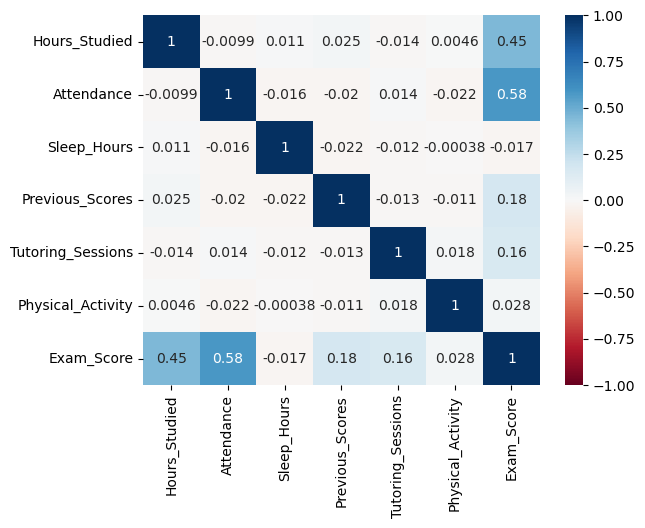

In [183]:
sns.heatmap(performance.corr(numeric_only=True), annot=True, vmin=-1, cmap='RdBu')
plt.show()

In [184]:
cat_cols= performance.select_dtypes(exclude=np.number).columns
cat_cols

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

### UNIVARIATE ANALYSIS

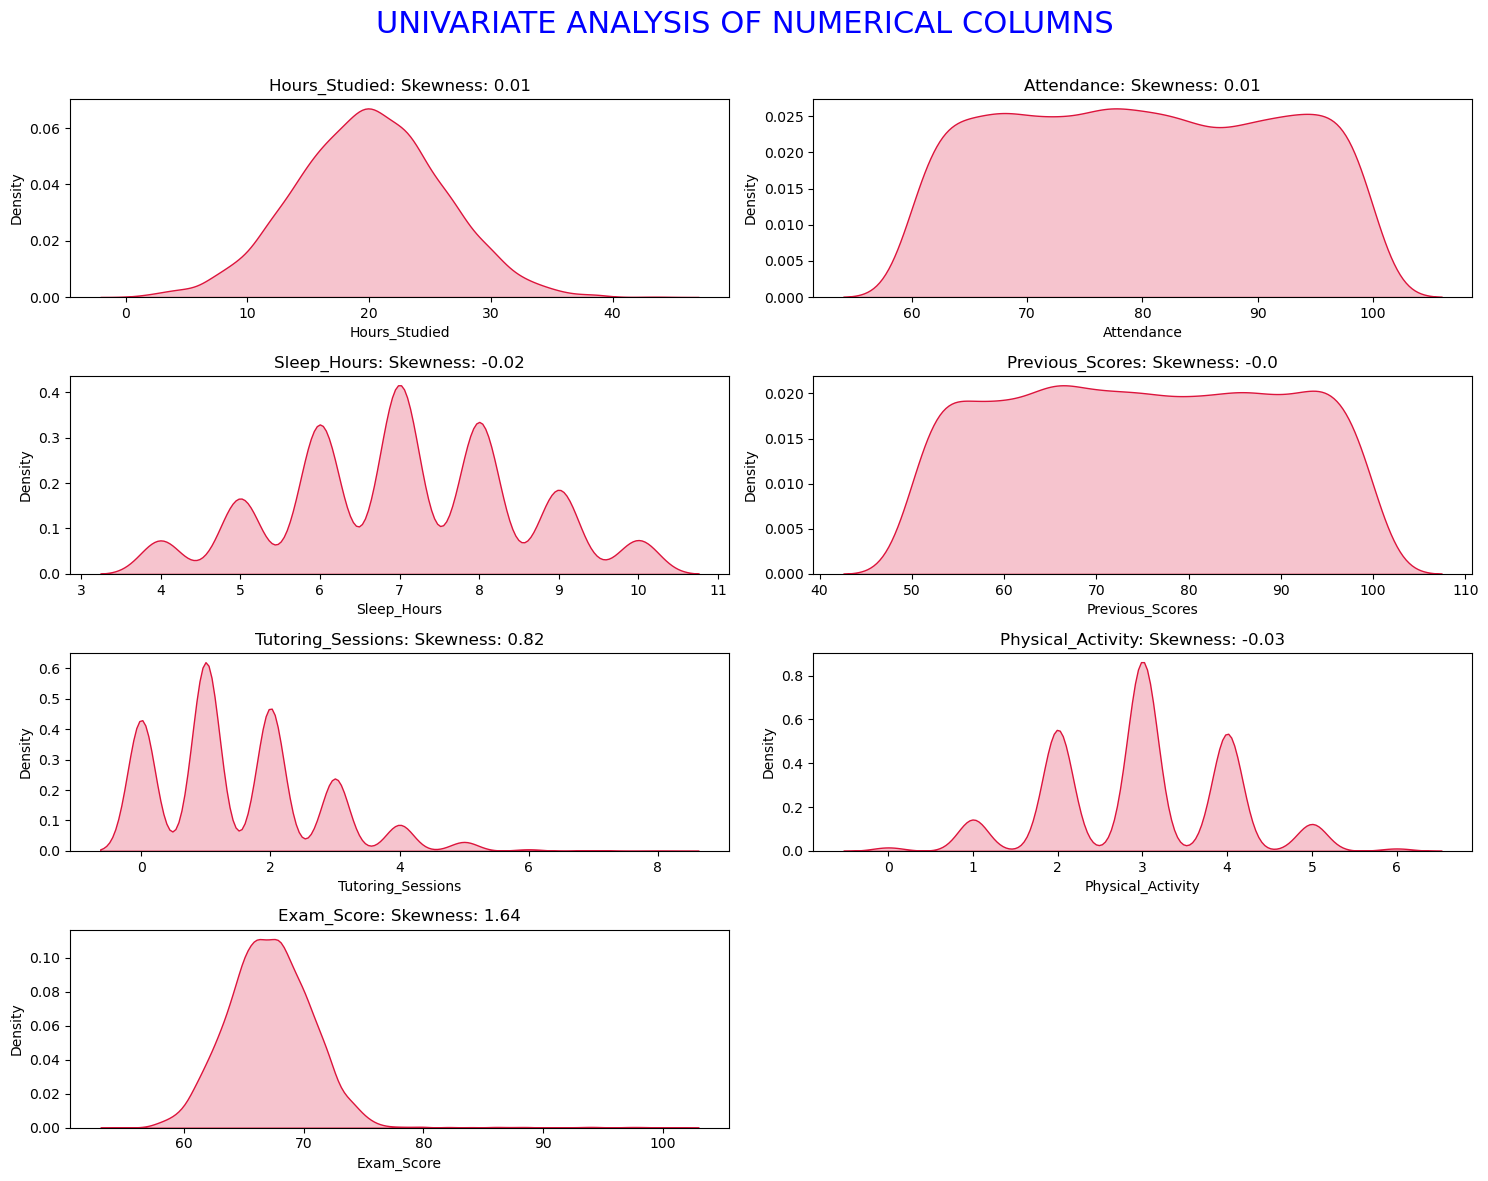

In [185]:
plt.figure(figsize=(15,12))
plt.suptitle('UNIVARIATE ANALYSIS OF NUMERICAL COLUMNS\n', color='blue', size=22)
t=1
for i in num_cols:
    plt.subplot(4,2,t)
    sns.kdeplot(data=performance, x=i, fill=True, color= 'crimson')
    sk= performance[i].skew()
    plt.title(f'{i}: Skewness: {round(sk,2)}')
    t+=1
plt.tight_layout()
plt.show()

**INFERENCE***

* For most of the numeric columns, we see that the data is not skewed.
* No. of hours studied has is majory distributed around 20hrs.
* Attendance has a wide spread. 
* Tutoring sessions and Exam scores show high positive skewness.

### VISUALIZING OUTLIERS

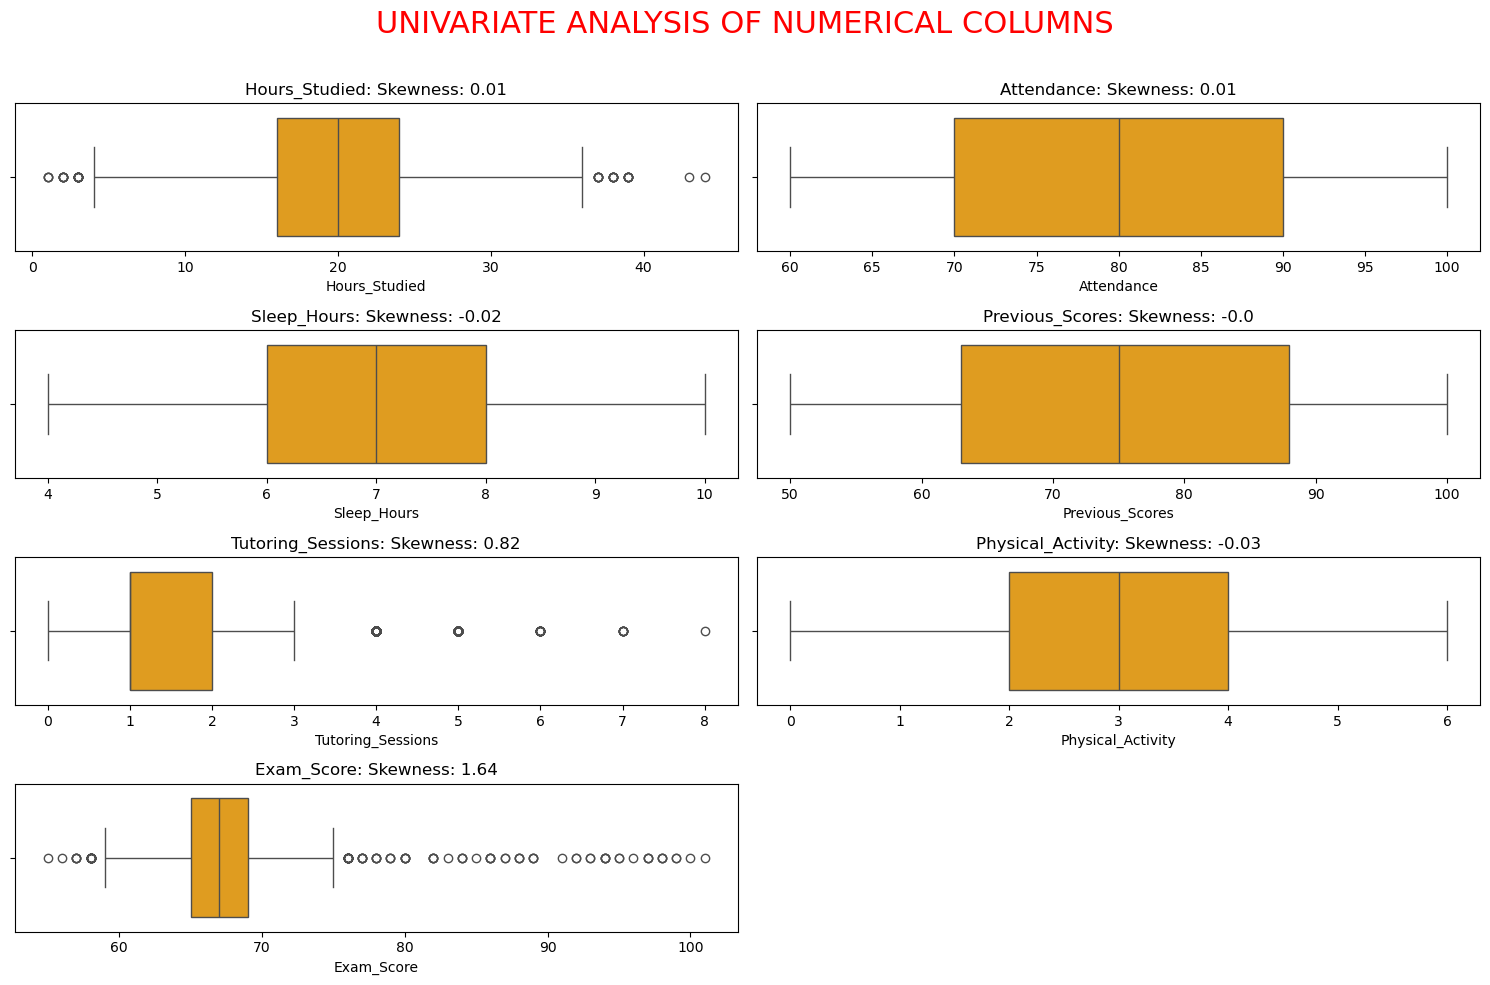

In [186]:
plt.figure(figsize=(15,10))
plt.suptitle('UNIVARIATE ANALYSIS OF NUMERICAL COLUMNS\n', color='red', size=22)
t=1
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data=performance, x=i, fill=True, color= 'orange')
    sk= performance[i].skew()
    plt.title(f'{i}: Skewness: {round(sk,2)}')
    t+=1
plt.tight_layout()
plt.show()

**INFERENCE**

* We see outliers at upper and lower tail in hours_studied and Exam_Score.
* Tutoring sessions have outliers at the upper tail.

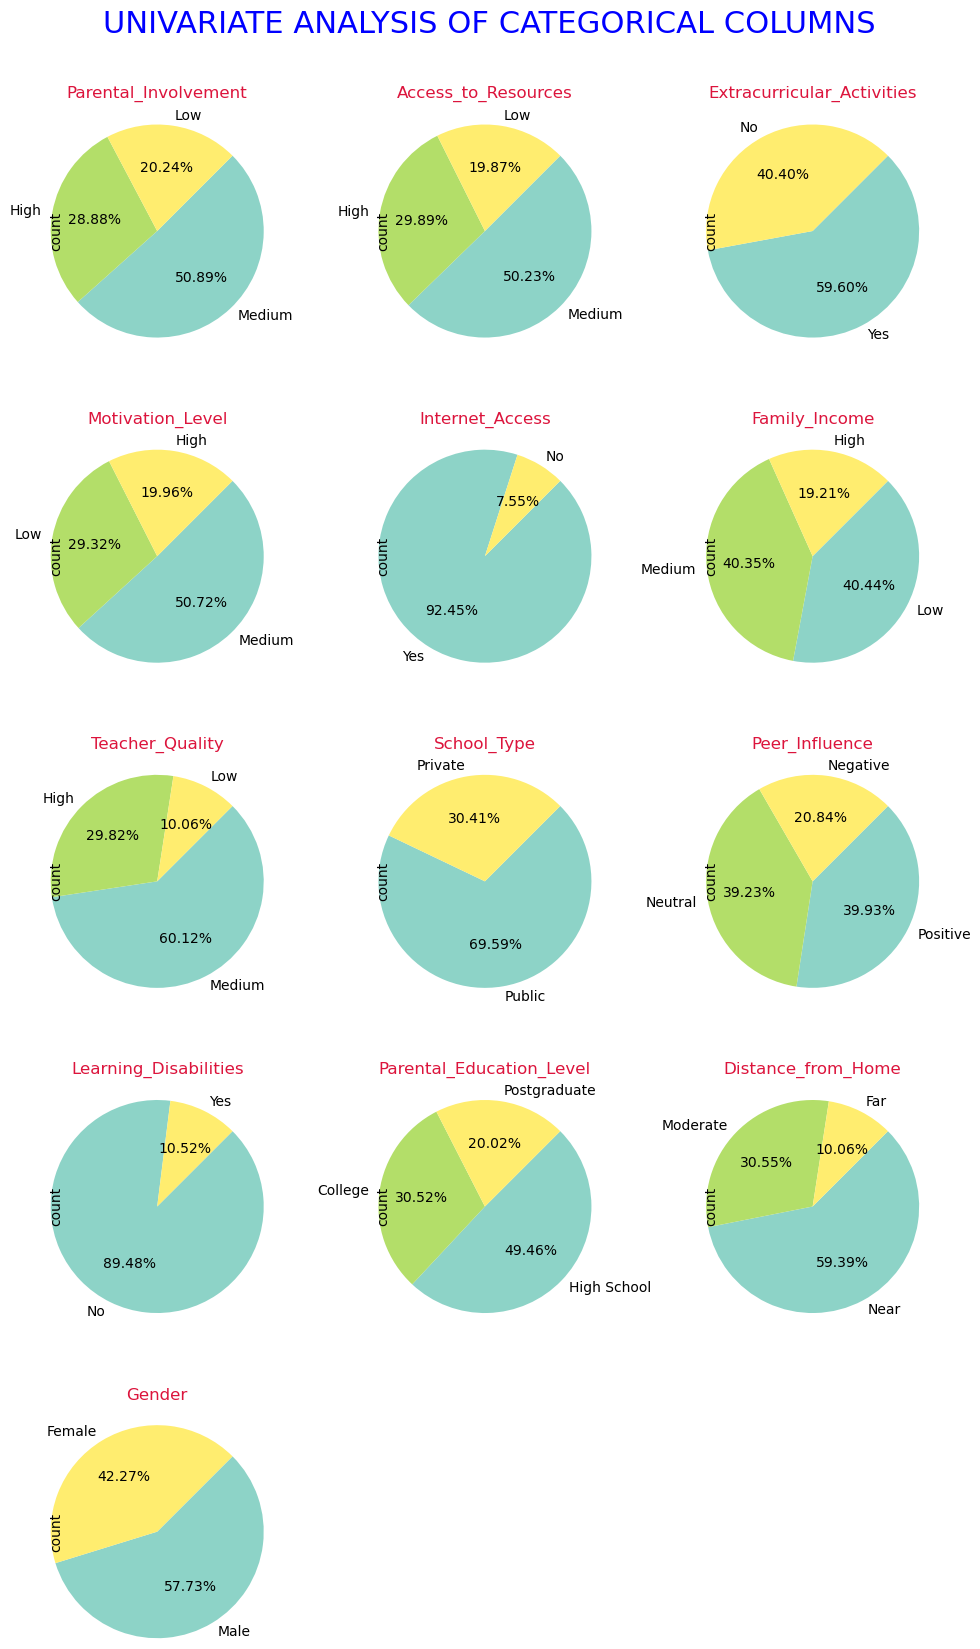

In [187]:
plt.figure(figsize=(10,17))
plt.suptitle('UNIVARIATE ANALYSIS OF CATEGORICAL COLUMNS\n', color='blue', size=22)
t=1
for i in cat_cols:
    plt.subplot(5,3,t)
    performance[i].value_counts().plot(kind='pie', counterclock=False, autopct='%.2f%%', startangle=45, radius=1.5, colormap='Set3')
    plt.title(f'{i}\n\n', color='crimson')
    t+=1
plt.tight_layout()
plt.show()

**INFERENCES**

* Parental Involvement is mostly moderate.
* 59.60% of the children are involved in extra curricular activities.
* 92.45% of the students have access to internet.
* 80.79% of children come from Low and Medium income group while 19.21% are from high income group.
* Most of the students are from public schools.
* 10.52% students have learning disabilities.
* The parents of the students mostly have studied upto high school.
* Males form 57.73% of the students.

### BIVARIATE ANALYSIS

In [188]:
#We take Exam_Score to be the target variable dependant on other factors.

#### NUM vs NUM

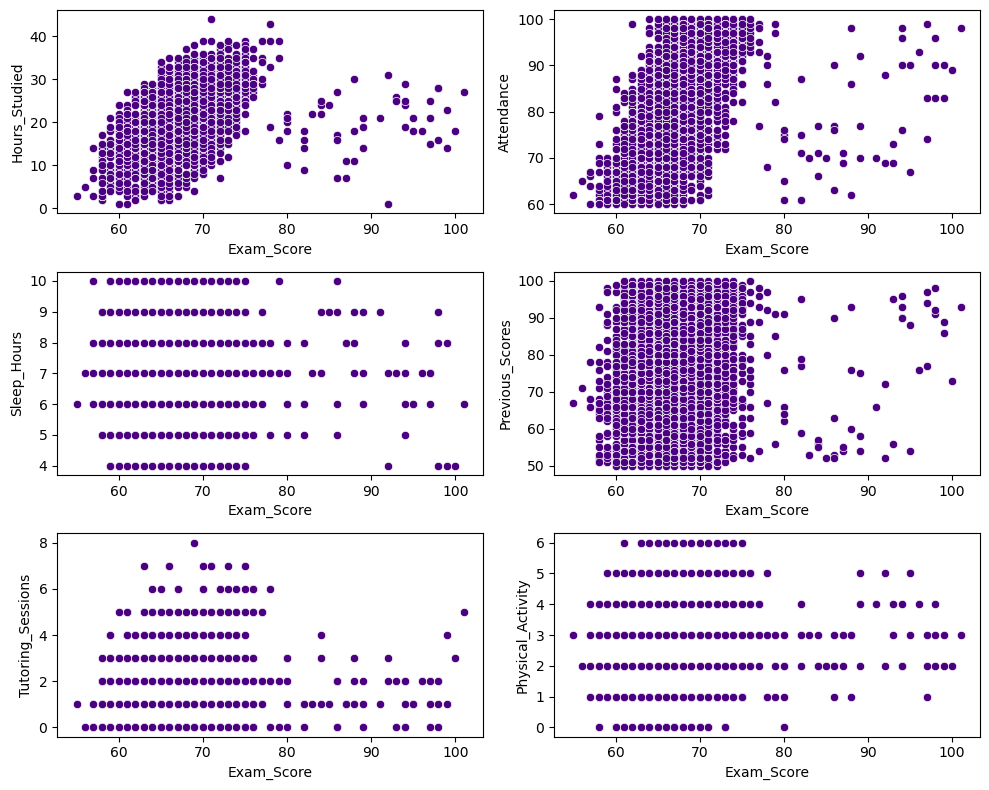

In [189]:
t=1
plt.figure(figsize=(10,8))
for i in num_cols:
    if i != 'Exam_Score':
        plt.subplot(3,2,t)
        sns.scatterplot(data=performance, x='Exam_Score', y=i, color='indigo')
        t+=1
plt.tight_layout()
plt.show()

**INFERENCE**

* We can clearly see that Exam Score is affected by hours studied and attendance. There is a positive correlation between them.
* The previous scores also have a weak correlation with Exam scores

#### NUM vs CAT

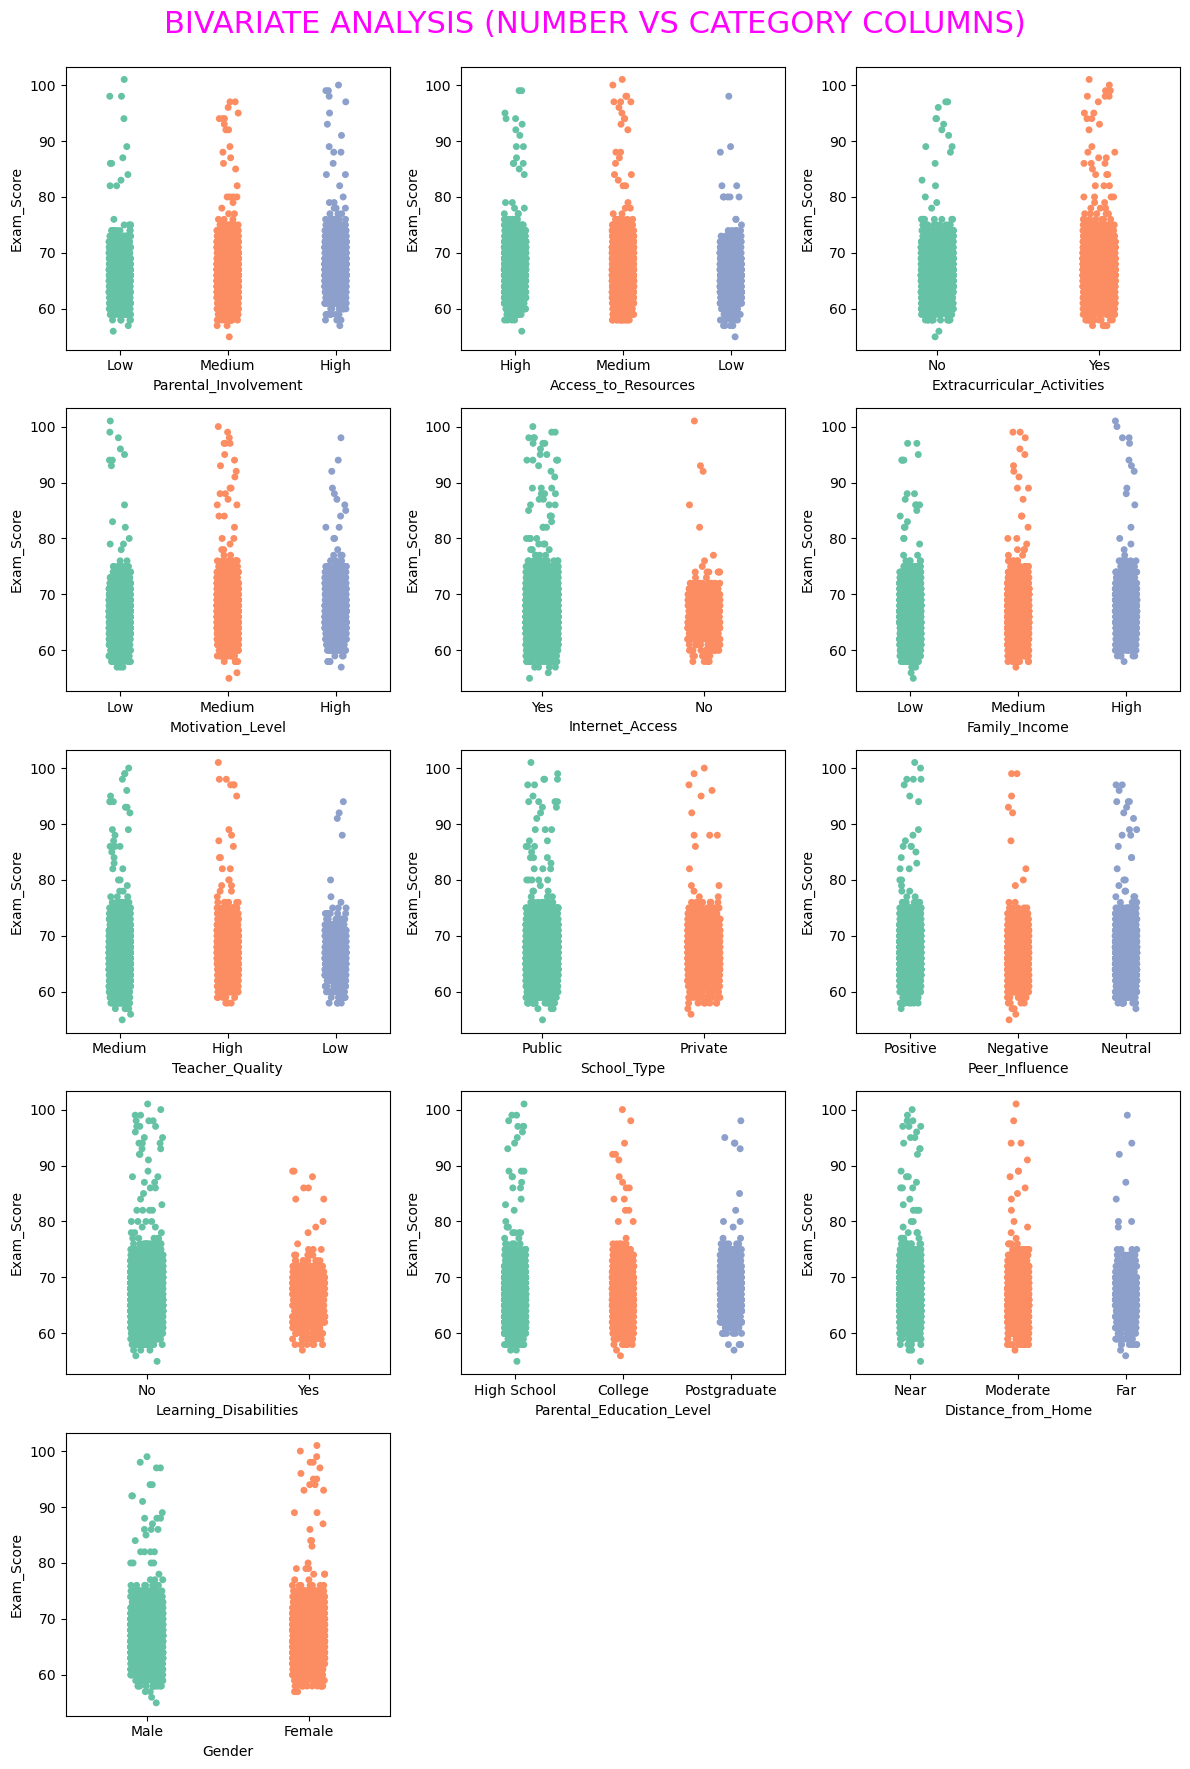

In [190]:
plt.figure(figsize=(12,18))
t=1
plt.suptitle('BIVARIATE ANALYSIS (NUMBER VS CATEGORY COLUMNS)\n', color='magenta', size=22)
for i in cat_cols:
    plt.subplot(5,3,t)
    sns.stripplot(data=performance, x=i, y='Exam_Score', palette='Set2')
    t+=1
plt.tight_layout()
plt.show()

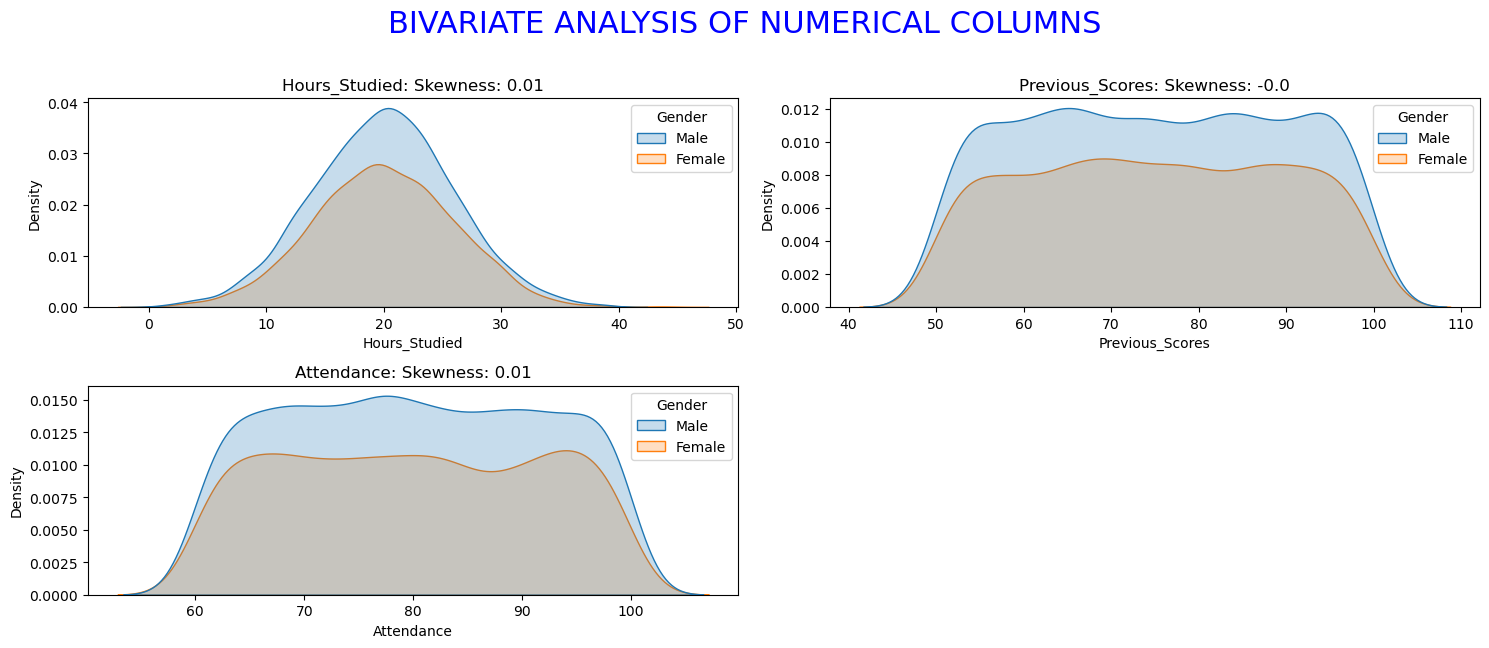

In [191]:
plt.figure(figsize=(15,12))
plt.suptitle('BIVARIATE ANALYSIS OF NUMERICAL COLUMNS\n', color='blue', size=22)
t=1
for i in ['Hours_Studied', 'Previous_Scores', 'Attendance']:
    plt.subplot(4,2,t)
    sns.kdeplot(data=performance, x=i, hue='Gender', fill=True)
    sk= performance[i].skew()
    plt.title(f'{i}: Skewness: {round(sk,2)}')
    t+=1
plt.tight_layout()
plt.show()

#### MULTIVARIATE ANALYSIS

<Figure size 640x480 with 0 Axes>

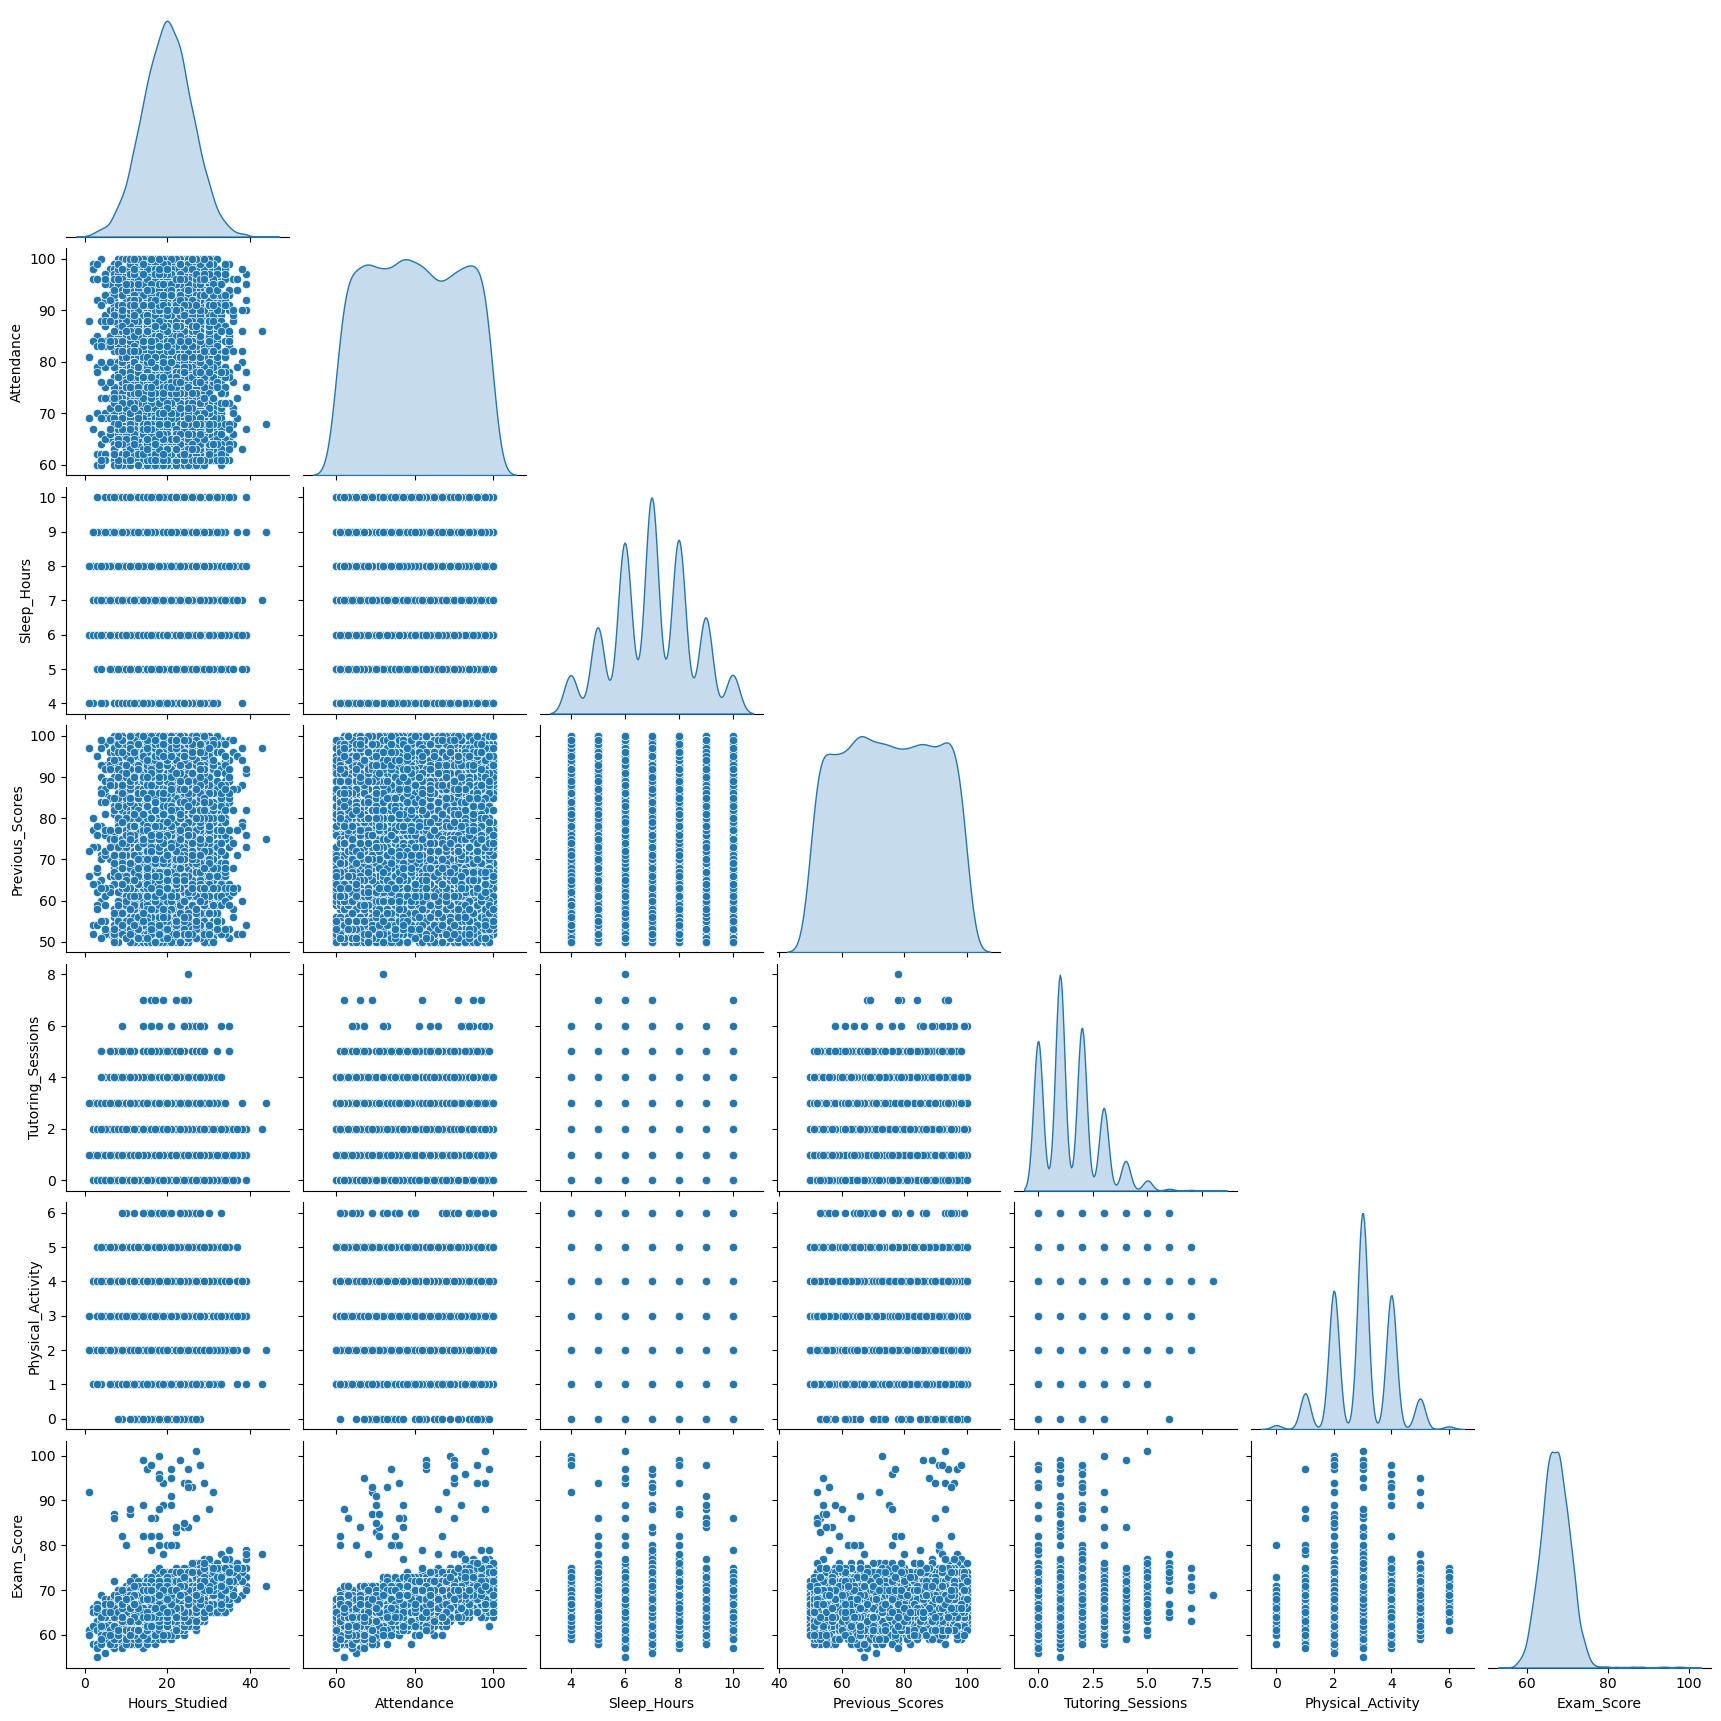

In [192]:
plt.suptitle('PAIRPLOT OF NUMERICAL COLUMNS')
sns.pairplot(performance[num_cols], diag_kind='kde', corner=True)
plt.show()

## DATA PREPROCESSING

In [193]:
performance['Exam_Score'].max()

101

#### The value of Exam score can be 100 at max thus this needs to be changed.

In [194]:
performance['Exam_Score']= np.where(performance['Exam_Score']==101, 100, performance['Exam_Score'])

### IDENTIFYING AND TREATING THE NULL VALUES

In [195]:
performance.isnull().mean()*100

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

In [196]:
performance[performance['Distance_from_Home'].isnull()]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
33,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,NaN,Female,61
275,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,NaN,Male,66
316,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,NaN,Male,68
359,15,64,Medium,Medium,Yes,6,76,High,Yes,2,Medium,Medium,Private,Positive,4,Yes,High School,NaN,Female,63
380,15,70,High,Medium,No,9,57,Medium,Yes,1,Medium,Medium,Private,Negative,3,No,High School,NaN,Female,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,11,72,High,Low,No,8,55,High,Yes,0,Medium,Low,Public,Neutral,3,Yes,College,NaN,Male,60
6494,14,77,Medium,Medium,Yes,4,81,Low,Yes,3,Medium,Medium,Private,Neutral,3,No,College,NaN,Female,66
6496,26,77,Low,Medium,Yes,7,71,High,Yes,3,High,Medium,Public,Neutral,3,No,High School,NaN,Female,69
6589,22,90,Low,High,No,5,99,Medium,Yes,1,Low,Low,Private,Positive,2,No,College,NaN,Female,70


In [197]:
performance['Distance_from_Home']=np.where(performance['Distance_from_Home'].isnull(), performance['Distance_from_Home'].mode(), performance['Distance_from_Home'] )

In [198]:
performance[performance['Teacher_Quality'].isnull()]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
127,17,97,Medium,Medium,No,8,89,Medium,Yes,1,Low,NaN,Public,Neutral,4,No,High School,Far,Male,69
396,10,80,High,Medium,Yes,6,93,High,Yes,4,Medium,NaN,Public,Negative,3,No,College,Moderate,Female,67
457,14,86,Medium,Low,Yes,8,90,Medium,No,3,Medium,NaN,Public,Negative,3,Yes,Postgraduate,Near,Male,65
570,20,71,High,Medium,No,8,77,Medium,Yes,0,High,NaN,Private,Neutral,4,No,High School,Moderate,Male,66
593,22,82,High,Medium,Yes,7,71,Low,Yes,1,High,NaN,Private,Positive,3,No,High School,Near,Female,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6414,22,63,Low,Low,Yes,7,94,Medium,Yes,0,Medium,NaN,Public,Negative,3,Yes,High School,Far,Male,61
6427,29,75,Low,Medium,Yes,7,96,Low,Yes,2,Low,NaN,Public,Positive,3,No,High School,Moderate,Male,68
6461,12,89,Medium,High,Yes,8,78,Low,Yes,4,Low,NaN,Public,Neutral,5,No,Postgraduate,Near,Female,69
6579,9,84,Medium,Medium,No,6,74,Medium,Yes,5,High,NaN,Public,Neutral,2,No,High School,Near,Male,67


In [199]:
performance.groupby(by= ['School_Type','Teacher_Quality'])['Exam_Score'].median()

School_Type  Teacher_Quality
Private      High               67.0
             Low                67.0
             Medium             67.0
Public       High               68.0
             Low                66.0
             Medium             67.0
Name: Exam_Score, dtype: float64

In [200]:
#as there is no difference in exam scores based on school type and teacher type, we will impute the values with mode of teacher_quality.

In [201]:
performance['Teacher_Quality']=np.where(performance['Teacher_Quality'].isnull(), performance['Teacher_Quality'].mode()[0], performance['Teacher_Quality'])

In [202]:
performance['Parental_Education_Level'].mode()[0]

'High School'

In [203]:
performance['Parental_Education_Level']=np.where(performance['Parental_Education_Level'].isnull(), performance['Parental_Education_Level'].mode()[0], performance['Parental_Education_Level'])

In [204]:
performance.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [205]:
#Thus, no more null values are present in dataset

In [206]:
performance.to_excel(r'C:\Users\mehak\EDA CaseStudy\performance_cleaned.xlsx', index=True)

In [207]:
performance.duplicated().sum()

np.int64(0)

In [208]:
#There are no duplicate rows in the dataset.

### FEATURE ENGINEERING

### N-1 Dummy Encoding

In [209]:
performance= pd.get_dummies(data=performance, columns=['Extracurricular_Activities','Internet_Access','School_Type','Learning_Disabilities','Gender'], drop_first=True, dtype=int)

In [210]:
performance.head(2)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male
0,23,84,Low,High,7,73,Low,0,Low,Medium,Positive,3,High School,Near,67,0,1,1,0,1
1,19,64,Low,Medium,8,59,Low,2,Medium,Medium,Negative,4,College,Moderate,61,0,1,1,0,0


### Ordinal Encoding

In [211]:
from sklearn.preprocessing import OrdinalEncoder

In [212]:
ordinal_encoding_list=['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality']

In [213]:
ord_encoder= OrdinalEncoder(categories=[['Low', 'Medium', 'High']], dtype=int)

In [214]:
for i in ordinal_encoding_list:
    performance[i]= ord_encoder.fit_transform(performance[[i]])

In [215]:
performance.head(2)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male
0,23,84,0,2,7,73,0,0,0,1,Positive,3,High School,Near,67,0,1,1,0,1
1,19,64,0,1,8,59,0,2,1,1,Negative,4,College,Moderate,61,0,1,1,0,0


In [216]:
ord_encoder= OrdinalEncoder(categories=[['Negative', 'Neutral', 'Positive']], dtype=int)
performance['Peer_Influence']= ord_encoder.fit_transform(performance[['Peer_Influence']])

In [217]:
ord_encoder= OrdinalEncoder(categories=[['High School', 'College', 'Postgraduate']], dtype=int)
performance['Parental_Education_Level']= ord_encoder.fit_transform(performance[['Parental_Education_Level']])

In [218]:
ord_encoder= OrdinalEncoder(categories=[['Near', 'Moderate', 'Far']], dtype=int)
performance['Distance_from_Home']= ord_encoder.fit_transform(performance[['Distance_from_Home']])

In [219]:
performance.head(2)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male
0,23,84,0,2,7,73,0,0,0,1,2,3,0,0,67,0,1,1,0,1
1,19,64,0,1,8,59,0,2,1,1,0,4,1,1,61,0,1,1,0,0


### FEATURE TRANSFORMATION

In [220]:
from sklearn.preprocessing import PowerTransformer
transformer=PowerTransformer(method='yeo-johnson',standardize=True)

In [221]:
performance[num_cols]=transformer.fit_transform(performance[num_cols])

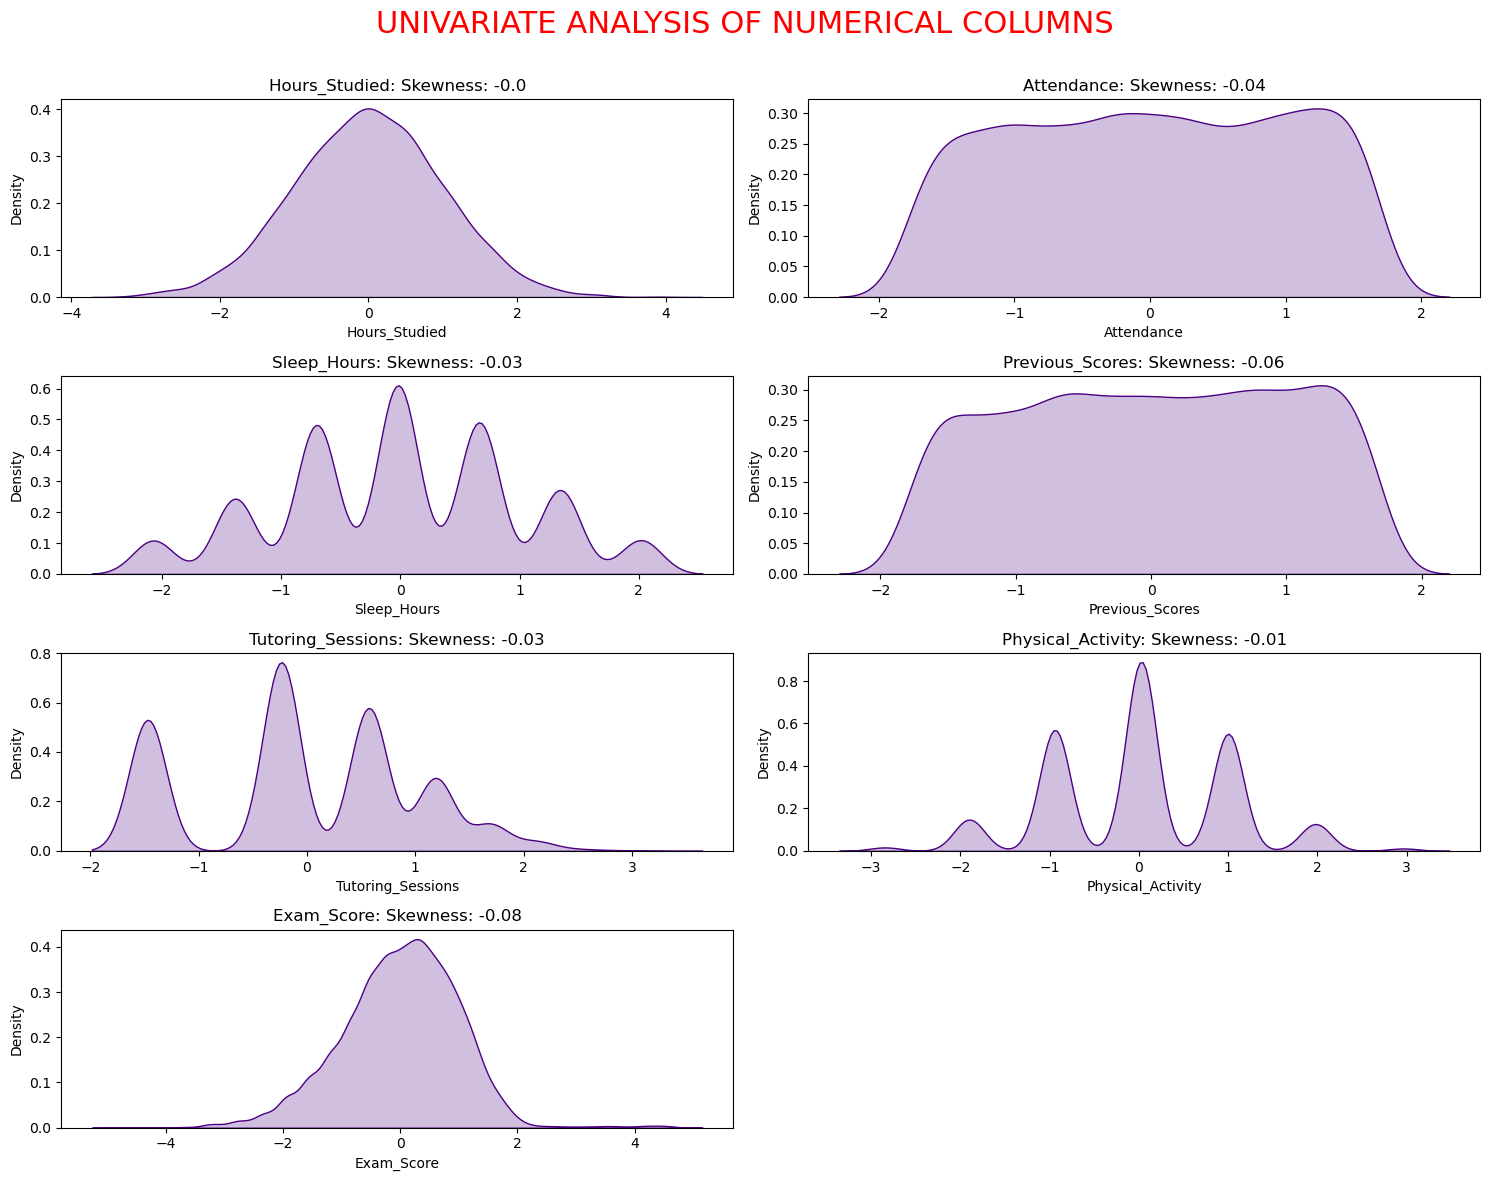

In [222]:
plt.figure(figsize=(15,12))
plt.suptitle('UNIVARIATE ANALYSIS OF NUMERICAL COLUMNS\n', color='red', size=22)
t=1
for i in num_cols:
    plt.subplot(4,2,t)
    sns.kdeplot(data=performance, x=i, fill=True, color= 'indigo')
    sk= performance[i].skew()
    plt.title(f'{i}: Skewness: {round(sk,2)}')
    t+=1
plt.tight_layout()
plt.show()

* **THE NULL VALUES HAVE BEEN TREATED USING IMPUTATION.**
* **CATEGORICAL COLUMNS HAVE BEEN TREATED USING N-1 AND ORDINAL ENCODING.**
* **THE OUTLIERS TREATMENT AND SCALING HAS BEEN DONE USING YHEO JOHNSON METHOD.**
* **FURTHER THE DATA IS READY FOR MACHINE MODELS.**

## Predictive Modelling

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [224]:
x=performance.drop(columns='Exam_Score')
y=performance['Exam_Score']

In [225]:
x_train, x_test, y_train, y_test= train_test_split(x,y, train_size=0.8, random_state=2)

In [226]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5285, 19), (5285,), (1322, 19), (1322,))

### Gradient Boosting

In [227]:
model_grad= GradientBoostingRegressor(n_estimators=250, min_samples_leaf=5)
model_grad.fit(x_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,250
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [228]:
ypred_grad= model_grad.predict(x_test)

In [229]:
model_grad_r2= r2_score(y_test, ypred_grad)
model_grad_mse= mean_squared_error(y_test, ypred_grad)

In [230]:
print('R2 Score:', model_grad_r2)
print('Mean Squared Error:', model_grad_mse)

R2 Score: 0.8204981351241121
Mean Squared Error: 0.18872437981918744


### Random Forest

In [231]:
model_rf= RandomForestRegressor(n_estimators=200)
model_rf.fit(x_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [232]:
ypred_rf= model_rf.predict(x_test)
model_rf_r2= r2_score(y_test, ypred_rf)
model_rf_mse= mean_squared_error(y_test, ypred_rf)

In [233]:
print('R2 Score:', model_rf_r2)
print('Mean Squared Error:', model_rf_mse)

R2 Score: 0.7569399917560202
Mean Squared Error: 0.2555480376006581


### XG Boost

In [234]:
model_xgb= XGBRegressor(max_depth=4, n_estimators=100)
model_xgb.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [235]:
ypred_xgb= model_xgb.predict(x_test)
model_xgb_r2= r2_score(y_test, ypred_xgb)
model_xgb_mse= mean_squared_error(y_test, ypred_xgb)

In [236]:
print('R2 Score:', model_xgb_r2)
print('Mean Squared Error:', model_xgb_mse)

R2 Score: 0.8072388328818318
Mean Squared Error: 0.20266492352462298


In [237]:
#We can see that the best scores are given by the gradient boost method.

### Model Performance of Gradient Boost: Train v/s Test 

In [238]:
ypred_grad= model_grad.predict(x_train)
print('Train Mean Squared Error:', mean_squared_error(y_train, ypred_grad))
print('Train R2 Score:', r2_score(y_train, ypred_grad))

Train Mean Squared Error: 0.09431738430898545
Train R2 Score: 0.9044523543951225


In [246]:
model_grad= GradientBoostingRegressor(n_estimators=230)
model_grad.fit(x_train, y_train)
ypred_grad= model_grad.predict(x_test)
model_grad_r2= r2_score(y_test, ypred_grad)
model_grad_mse= mean_squared_error(y_test, ypred_grad)

In [247]:
print('Test Mean Squared Error:', model_grad_mse)
print('Train R2 Score:', model_grad_r2)

Test Mean Squared Error: 0.19745895393575544
Train R2 Score: 0.8121903990259844
